In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
def laplace_gen(n):
    return np.random.laplace(0, 1 / np.sqrt(2), n)

def poisson_gen(n): s
    return np.random.poisson(10, n)

def uniform_gen(n):
    return np.random.uniform(-np.sqrt(3), np.sqrt(3), n)

distr_gen = {
    'standard_normal' : np.random.standard_normal,
    'standard_cauchy' : np.random.standard_cauchy,
    'laplace' : laplace_gen,
    'poisson' : poisson_gen,
    'uniform' : uniform_gen
}

def E(z):
    return np.mean(z)

def IQR(X):
    return np.quantile(X, 3 / 4) - np.quantile(X, 1 / 4)

def get_emission_percentage(X):
    emissions = 0
    
    for x in X:
        if x < np.quantile(X, 1 / 4) - (3 / 2) * IQR(X) or np.quantile(X, 3 / 4) + (3 / 2) * IQR(X) < x:
            emissions += 1
    
    return (emissions / X.size) * 100

power = [20, 100]
np.random.seed(0)

Выборка,Средний процент выбросов
standard_normal,_
standard_normal n=20,2.67
standard_normal n=100,1.02
standard_cauchy,_
standard_cauchy n=20,15.19
standard_cauchy n=100,16.38
laplace,_
laplace n=20,8.76
laplace n=100,6.26
poisson,_


<Figure size 864x504 with 0 Axes>

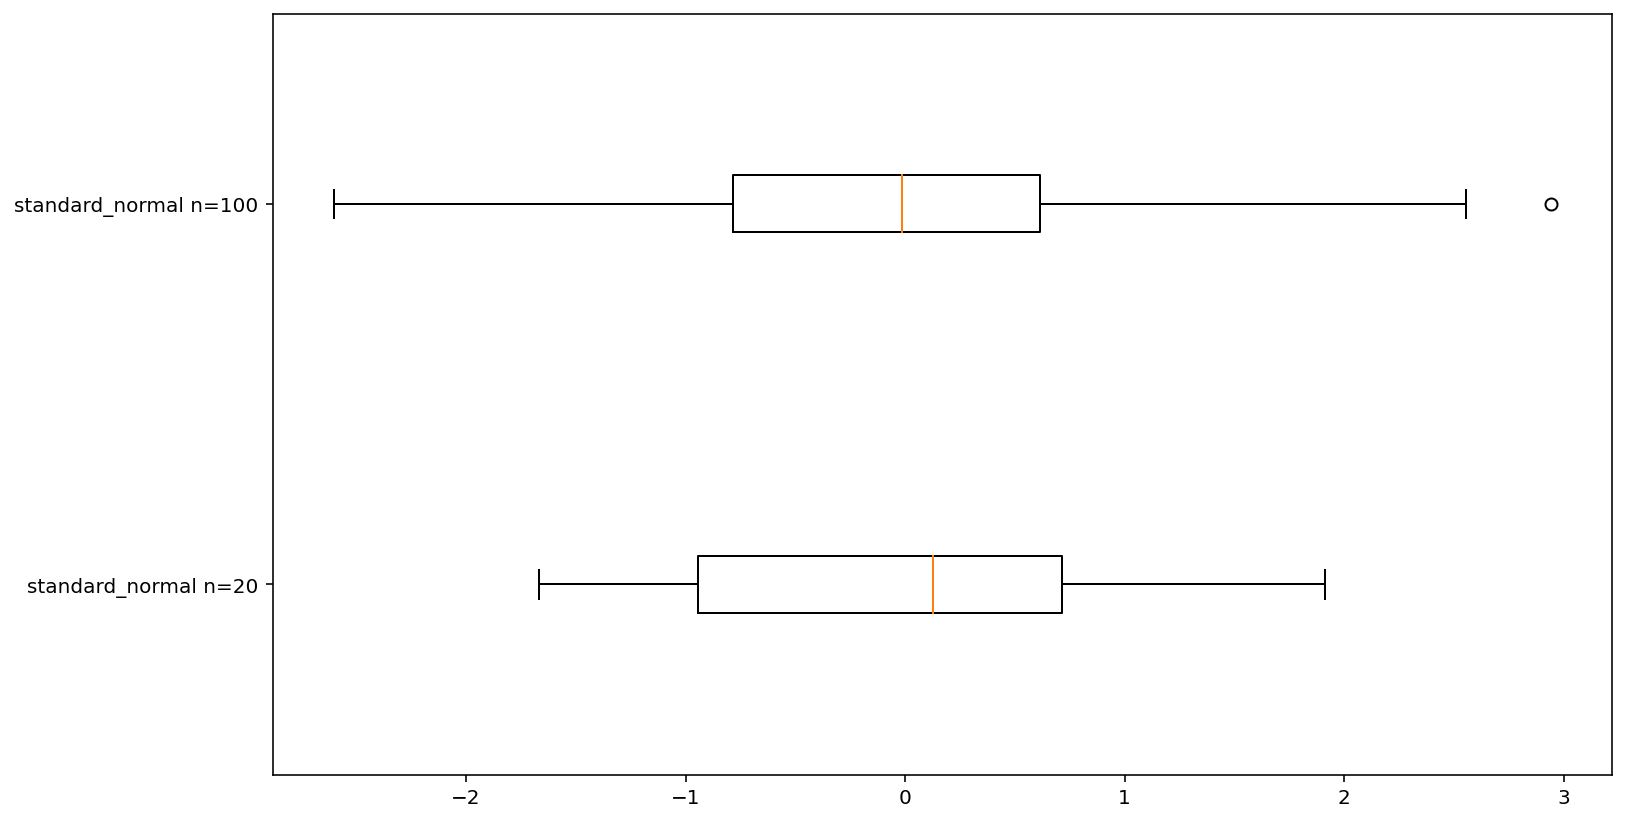

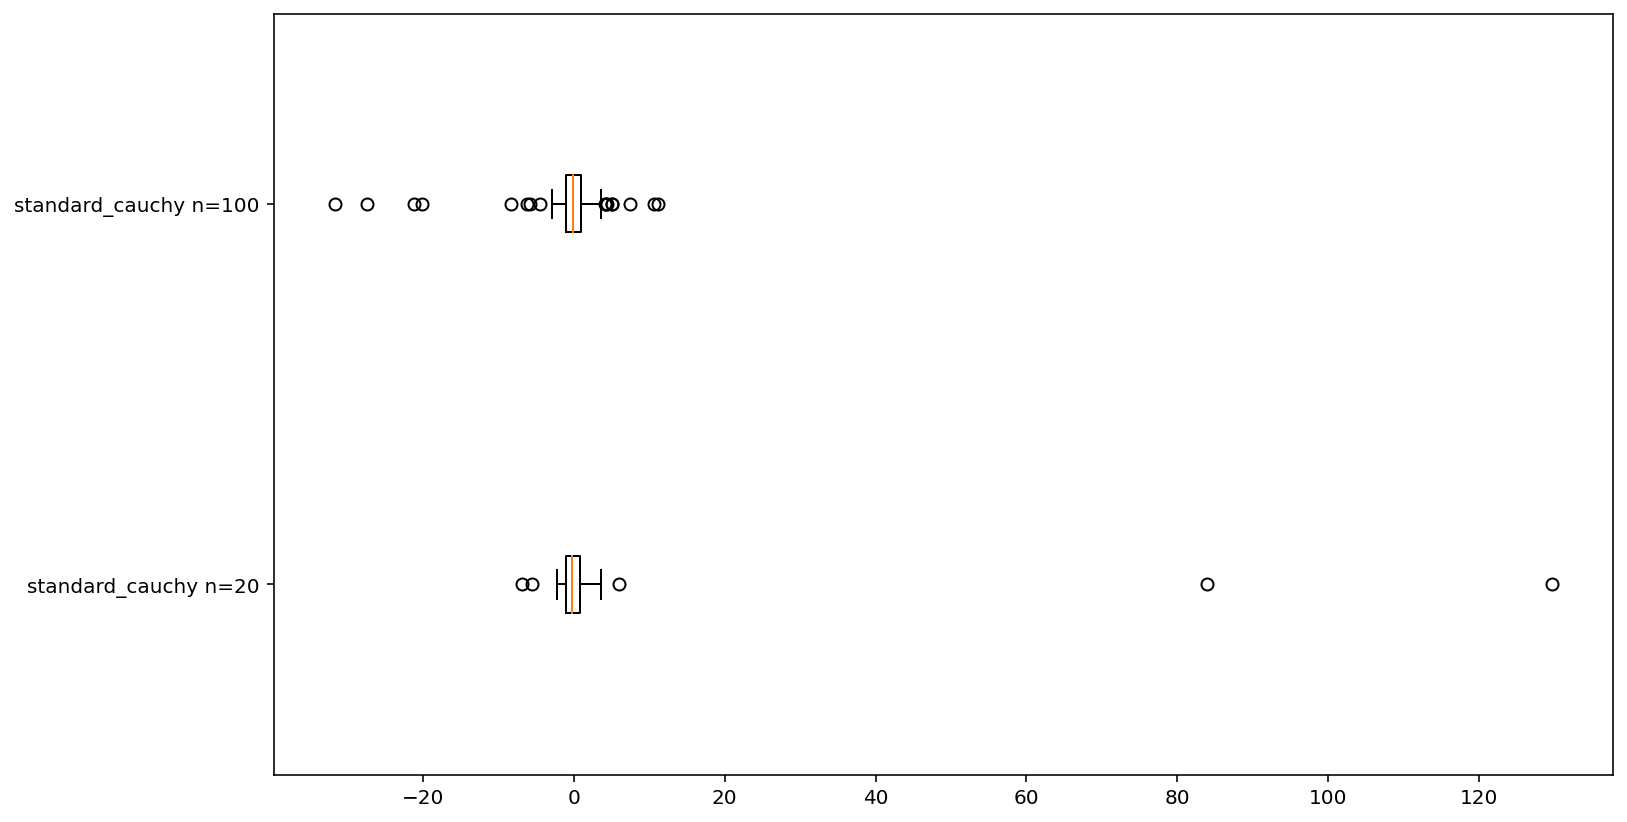

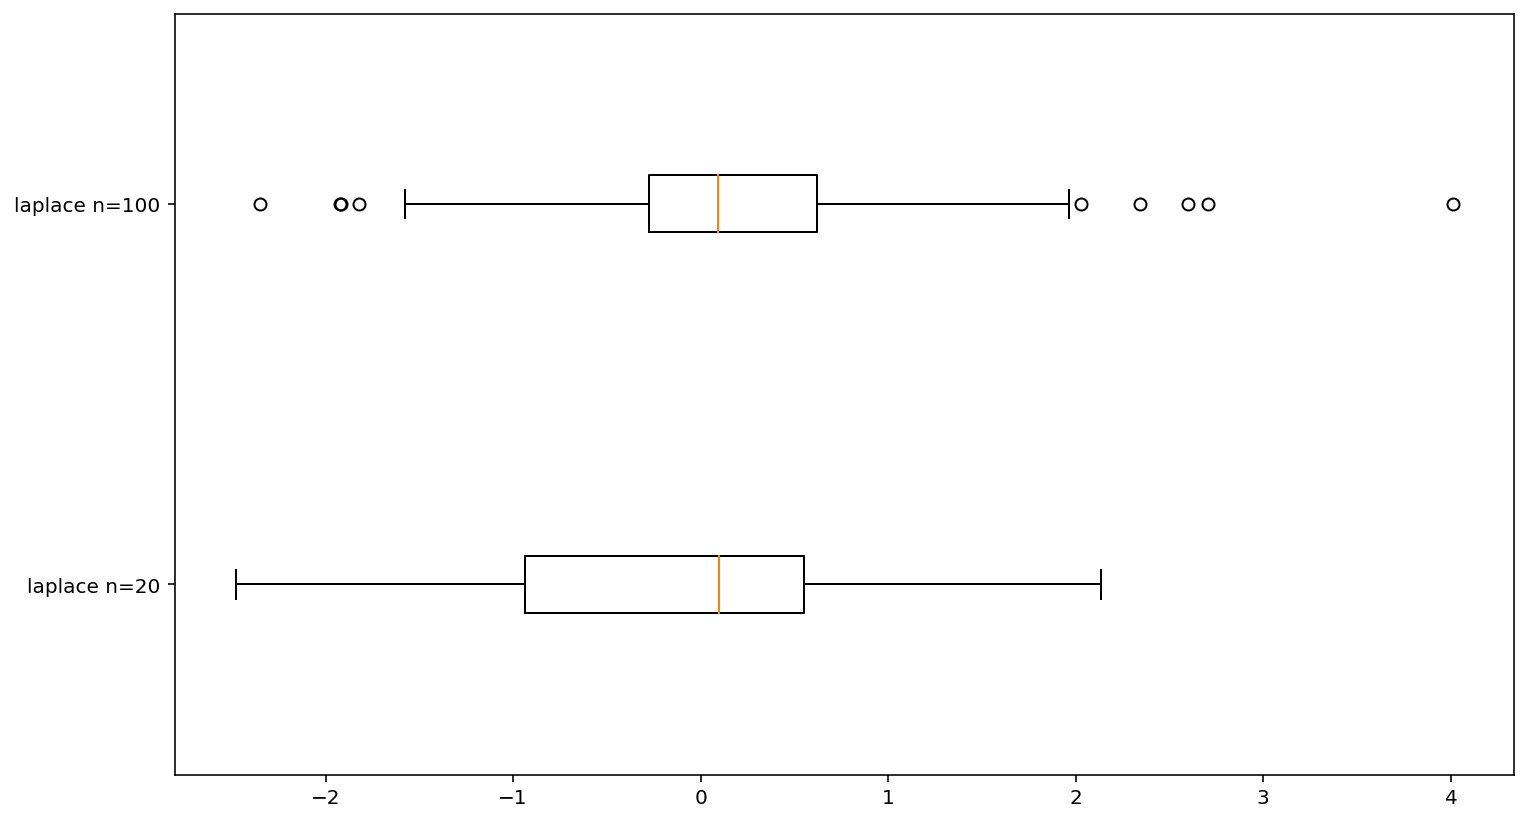

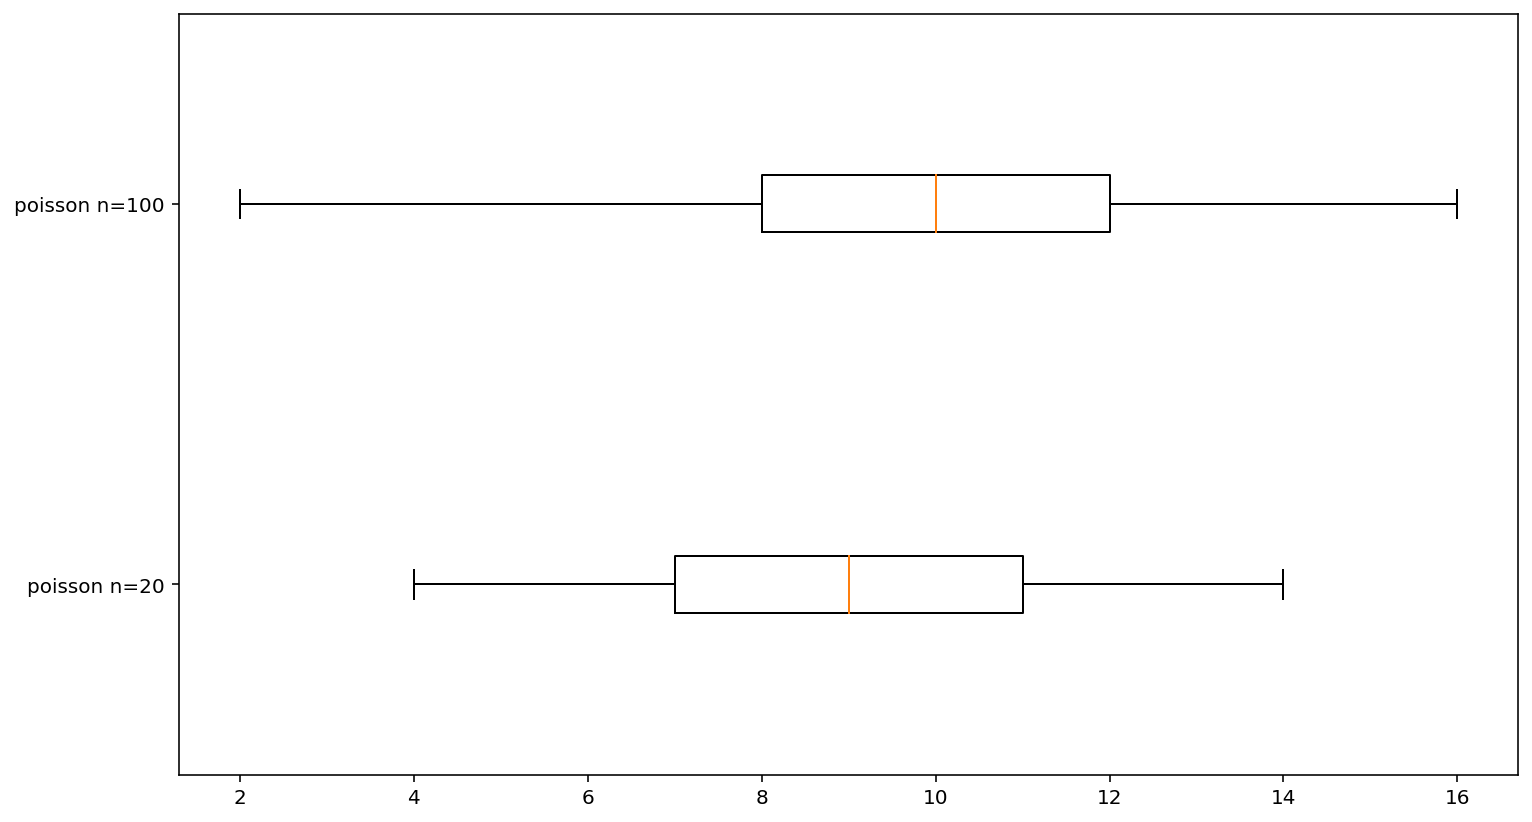

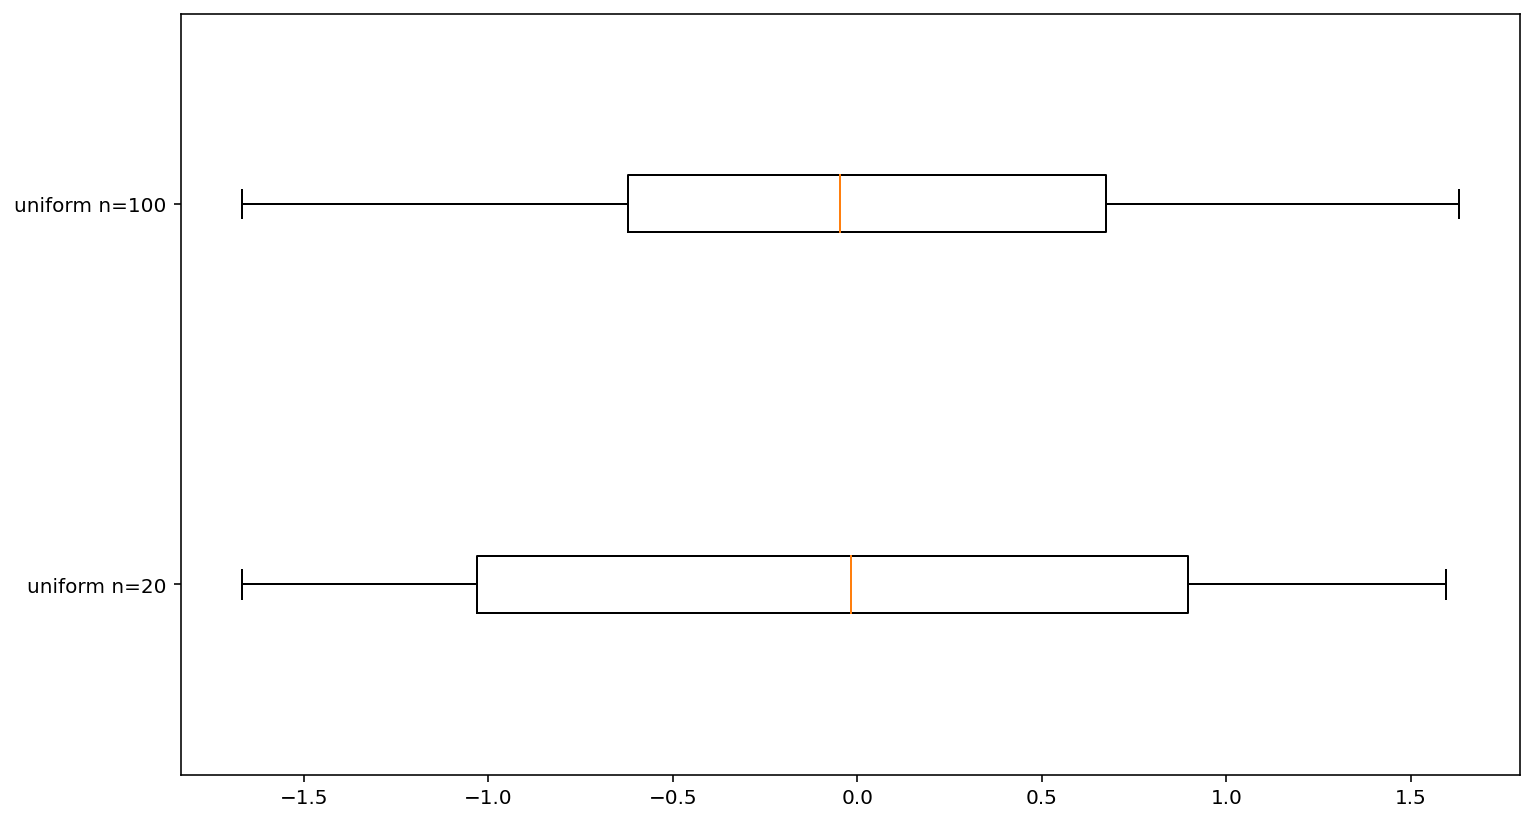

In [3]:
table = pd.DataFrame([], columns = ['Средний процент выбросов'])
table.columns.name = 'Выборка'

plt.tight_layout()

for distr_name in distr_gen.keys():
    fig, ax = plt.subplots()
    data = []
    sample_labels = []
    table.loc[distr_name] = '_'
    
    for n in power:
        emission_percentages = []
        sample = []
        
        for i in range(1000):
            sample = np.sort(distr_gen[distr_name](n))
            emission_percentages.append(get_emission_percentage(sample))
        
        label = distr_name + ' n=' + str(n)
        table.loc[label] = E(np.array(emission_percentages))
        data.append(sample)
        sample_labels.append(label)
        
        
    ax.boxplot(data, vert = False, labels = sample_labels)
    fig.savefig(distr_name)

display(table)